#Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# loading the data from csv file to a Pandas DataFrame

In [2]:

customer_data = pd.read_csv('/content/mall dataset.csv')

first 5 rows in the dataframe

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Data Preprocessing
Cleaning the data, handling missing values, and encode categorical variables if necessary...

In [4]:
# Summary statistics
print(customer_data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [6]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
X = customer_data.iloc[:,[3,4]].values

In [8]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [9]:
# handling missing values
# Calculate the mean for numeric columns only
numeric_data = customer_data.select_dtypes(include=np.number)
customer_data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

# Convert categorical columns to numerical
customer_data = pd.get_dummies(customer_data, drop_first=True)
print (customer_data.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39         True
1           2   21                  15                      81         True
2           3   20                  16                       6        False
3           4   23                  16                      77        False
4           5   31                  17                      40        False


In [10]:
# handling missing values
customer_data.fillna(customer_data.mean(), inplace=True)

#Feature Selection
Choose which features will be used for clustering.drop unnecessary columns.

In [11]:
# Select relevant features for clustering
features = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Display the selected features
print(features.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [12]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display scaled features
print(pd.DataFrame(scaled_features, columns=features.columns).head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


#Applying DBSCAN Clustering

In [13]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(scaled_features)

# Append cluster labels to the original dataset
customer_data['Cluster'] = clusters

# Display the data with cluster labels
print(customer_data.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0           1   19                  15                      39         True   
1           2   21                  15                      81         True   
2           3   20                  16                       6        False   
3           4   23                  16                      77        False   
4           5   31                  17                      40        False   

   Cluster  
0       -1  
1        0  
2       -1  
3        0  
4       -1  


Determining Optimal Clusters -1,0

Choosing the number of clusters =5

In [14]:
# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters


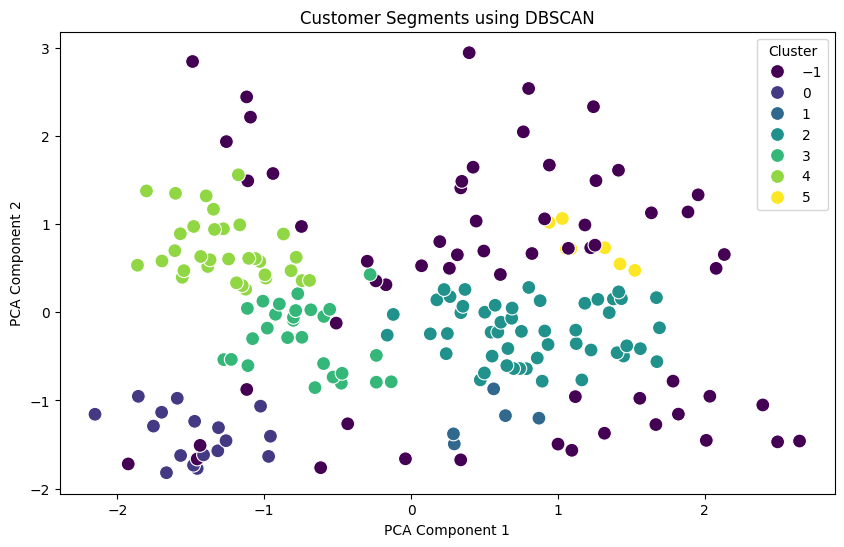

In [15]:
#visualization  of dbscan clustering
# Ploting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Customer Segments using DBSCAN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

WCSS -> Within Clusters Sum of Squares

In [16]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

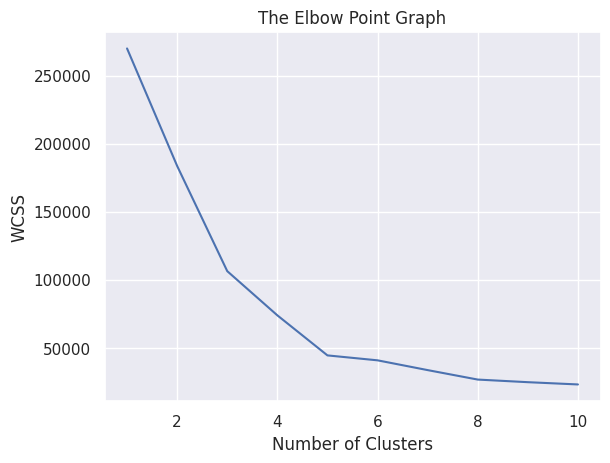

In [17]:
# plot an elbow graph using term  wcss

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

#Training the k-Means Clustering Model

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


#Apply K-Means Clustering

In [19]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Append cluster labels to the original dataset
customer_data['Cluster'] = clusters

# Display the data with cluster labels
print(customer_data.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0           1   19                  15                      39         True   
1           2   21                  15                      81         True   
2           3   20                  16                       6        False   
3           4   23                  16                      77        False   
4           5   31                  17                      40        False   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


5 Clusters - 0, 1, 2, 3, 4

In [20]:
# using PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_features)
print(pca_results)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['Spending Score', 'Annual Income'])
pca_df['Cluster'] = clusters

[[-6.15720019e-01 -1.76348088e+00]
 [-1.66579271e+00 -1.82074695e+00]
 [ 3.37861909e-01 -1.67479894e+00]
 [-1.45657325e+00 -1.77242992e+00]
 [-3.84652078e-02 -1.66274012e+00]
 [-1.48168526e+00 -1.73500173e+00]
 [ 1.09461665e+00 -1.56610230e+00]
 [-1.92630736e+00 -1.72111049e+00]
 [ 2.64517786e+00 -1.46084721e+00]
 [-9.70130513e-01 -1.63558108e+00]
 [ 2.49568861e+00 -1.47048914e+00]
 [-1.45688256e+00 -1.66436050e+00]
 [ 2.01018729e+00 -1.45329897e+00]
 [-1.41321072e+00 -1.61776746e+00]
 [ 1.00042965e+00 -1.49579176e+00]
 [-1.56943170e+00 -1.62502669e+00]
 [ 2.94060318e-01 -1.49425585e+00]
 [-1.31624924e+00 -1.57216383e+00]
 [ 1.31669910e+00 -1.37243404e+00]
 [-1.43679899e+00 -1.51039469e+00]
 [ 2.88561175e-01 -1.37988135e+00]
 [-1.26018513e+00 -1.45723906e+00]
 [ 1.66684303e+00 -1.27396755e+00]
 [-9.57849842e-01 -1.40613544e+00]
 [ 1.82015978e+00 -1.15548636e+00]
 [-1.31148032e+00 -1.30928557e+00]
 [ 8.70423506e-01 -1.20135126e+00]
 [-4.31580912e-01 -1.26551061e+00]
 [ 6.42532610e-01 -1

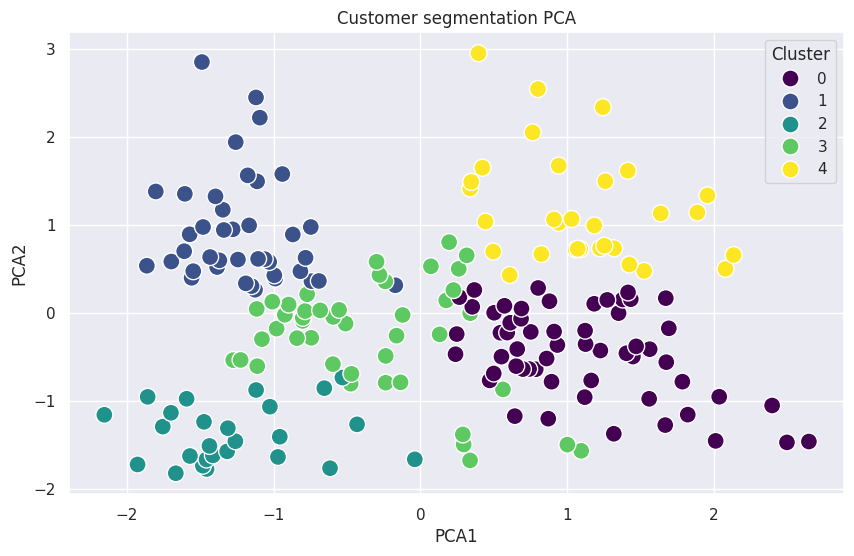

In [24]:
# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=150)
plt.title('Customer segmentation PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

#Visualizing all the Clusters

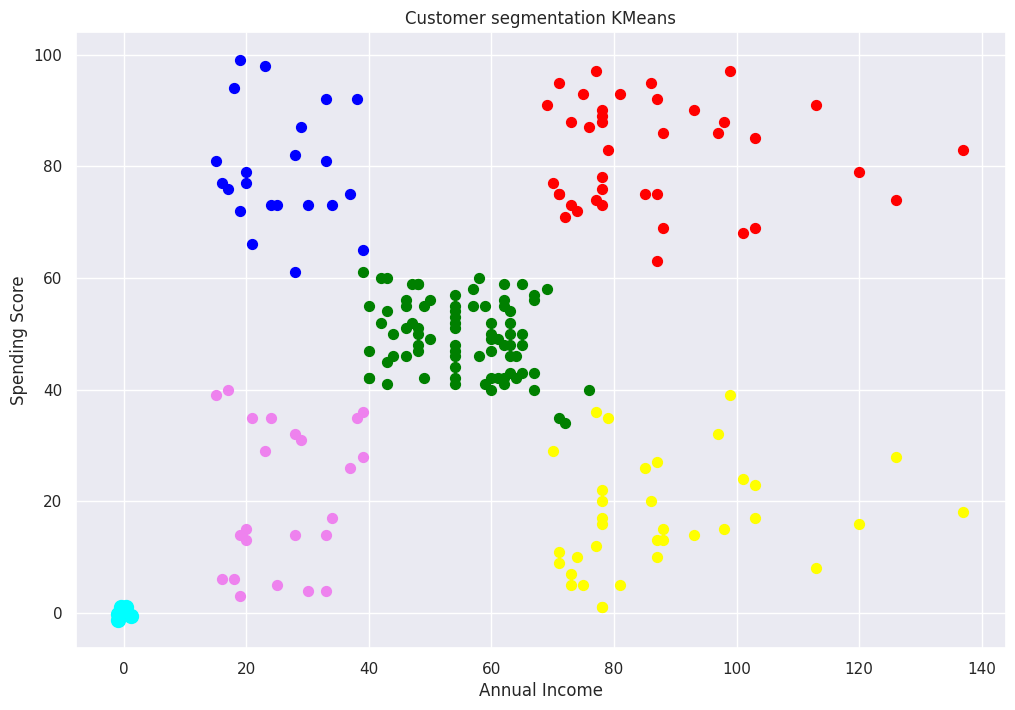

In [25]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(12,8))
colors = ['red', 'green', 'blue', 'cyan', 'magenta']
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer segmentation KMeans')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#summary

The document showcases a Python implementation for visualizing customer segmentation using K-means clustering,DBSCAN clustering primarily focusing on plotting the clusters and their centroids based on annual income and spending score.
The visualization aims to provide insights into customer behavior, which can inform marketing strategies.